In [2]:
%matplotlib inline

In [3]:
import numpy as np
from scipy.stats import norm, chi2, t
from statsmodels.formula.api import ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
sns.set(style="ticks", palette="Set2")

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Caso 2.1A.- Estimación de una función de consumo con datos de corte transversal.

En este ejercicio vamos a analizar la relación entre el consumo y la renta para un conjunto de familias, tratando de evaluar la función de consumo keynesiana. Los datos se refieren a los gastos en consumo y la renta de 50 familias, que se muestran en la siguiente tabla: 

|     |CONSUMO|RENTA||CONSUMO|RENTA|
|:---|:--------:|:------:|:---|:--------:|:------:|
|Familia 1| 1080,5| 1000|Familia 13| 3033,8| 3400|
|Familia 26| 5782,6| 6051|Familia 38| 6808,6| 8407|
|Familia 2| 1239,8| 1020|Familia 14| 3310,4| 3990|
|Familia 27| 4201,4| 6200|Familia 39| 7089,8| 8900|
|Familia 3| 1540,7| 1200|Familia 15| 4077,2| 4000|
|Familia 28| 6058,7| 6406|Familia 40| 6236,6| 9000|
|Familia 4| 1773,8| 1500|Familia 16| 2987,6| 4010|
|Familia 29| 4946,0| 6802|Familia 41| 6623,3| 9072|
|Familia 5| 1896,5| 1990|Familia 17| 3812,0| 4100|
|Familia 30| 5690,3| 7000|Familia 42| 7009,1| 9300|
|Familia 6| 1691,0| 2000|Familia 18| 3921,8| 4400|
|Familia 31| 5956,6| 7043|Familia 43| 8645,6| 9700|
|Familia 7| 1979,6| 2010|Familia 19| 4122,2| 4800|
|Familia 32| 4556,6| 7100|Familia 44| 9578,0| 9990|
|Familia 8| 1940,0| 2020|Familia 20| 4530,8| 5000|
|Familia 33| 6069,5| 7600|Familia 45| 7355,0| 10000|
|Familia 9| 2502,5| 2900|Familia 21| 4042,2| 5025|
|Familia 34| 7763,9| 7992|Familia 46| 7276,4| 10030|
|Familia 10| 2909,6| 3000|Familia 22| 3741,6| 5103|
|Familia 35| 6254,0| 8000|Familia 47| 9506,6| 10100|
|Familia 11| 2644,7| 3032|Familia 23| 4720,4| 5500|
|Familia 36| 5755,7| 8056|Familia 48| 8293,7| 10506|
|Familia 12| 2813,0| 3200|Familia 24| 5235,5| 5920|
|Familia 37| 6506,8| 8201|Familia 49| 7443,6| 10709|
|Familia 25| 5281,7| 6000|


    Alternativamente, se pueden tomar datos del INE de la encuesta de presupuestos familiares Base 2006 y de la encuesta anual de coste laboral, para obtener datos del Gasto total medio por unidad de consumo (asimilable al gasto en consumo anual) y Salario medio (asimilable a la renta anual) por comunidad autónoma y para un año determinado. Los resultados de las encuestas anteriores se encuentran en las secciones del INE correspondientes a Condiciones de vida y Mercado laboral respectivamente. Tendremos de esta manera datos de 18 comunidades autónomas españolas que podemos analizar.

Lo primero que vamos a hacer es un gráfico de dispersión entre las dos variables, para, a continuación hacer la regresión entre ambas. Una vez hecha la regresión y habiendo comentado los resultados desde el punto de vista económico, vamos a tratar de detectar la posible presencia de heteroscedasticidad por diversos métodos.

# TEORÍA

La función de consumo fue definida por primera vez por John Maynard Keynes (5 de junio de 1883 – 21 de abril de 1946)[^1] en su libro _La Teoría General del Empleo, el Interés y el Dinero_ (1936). El objetivo de esta función es calcular la cantidad de consumo en una economía, para ello se define una función C, que es igual a un consumo autónomo ($c_a$) necesario para subsistir que no depende de la renta corriente y de consumo inducido que sí depende el nivel de renta de la economía.

[^1]: https://es.wikipedia.org/wiki/John_Maynard_Keynes

$$C = c_a + c_y(Y-T)$$

donde:
- C = Consumo total
- $c_a$ = Consumo autónomo ($c_a > 0$)
- $c_y$ = Propensión marginal a consumir ($0<c_b<1$)
- Y-T = Renta disponible

La propensión marginal a consumir, es la proporción de renta que no se ahorra (se destina al consumo). Es importatne notar que Keynes asume que el incremento en la renta es menor que el incremento en consumo, de ahí que la propensión marginal a consumir esté entre 0 y 1.

Las teorías mas importantes desarrolladas a partir de la función de consumo de Keynes son la del Gasto en Consumo Relativo de Duesenberry (1949), la de la Renta del Ciclo Vital de Modigliani y Brumberg's (1954) y la de la Renta Permanente de Friedman (1957).[^2]

[^2]: https://es.wikipedia.org/wiki/Funci%C3%B3n_de_consumo

# a) 
## Método gráfico: 

Se trata de hacer un gráfico de los __residuos__ para ver si su varianza permanece constante. Además, se puede hacer otro gráfico de dispersión de la __serie del cuadrado de los residuos__ frente a la variable __Renta al cuadrado__ para analizar si existe algún grado de dependencia.

In [5]:
data = pd.read_csv('datos_caso2.1A.csv', index_col=0)
data.sort_index(inplace=True)

In [6]:
data.head()

,consumo,renta
obs,,
1,1080.5,1000
2,1239.8,1020
3,1540.7,1200
4,1773.8,1500
5,1896.5,1990


In [7]:
data.describe()

,consumo,renta
count,49.000000,49.000000
mean,4861.985714,5883.367347
std,2254.407716,2920.202417
min,1080.500000,1000.000000
25%,2987.600000,3400.000000
50%,4720.400000,6000.000000
75%,6506.800000,8201.000000
max,9578.000000,10709.000000


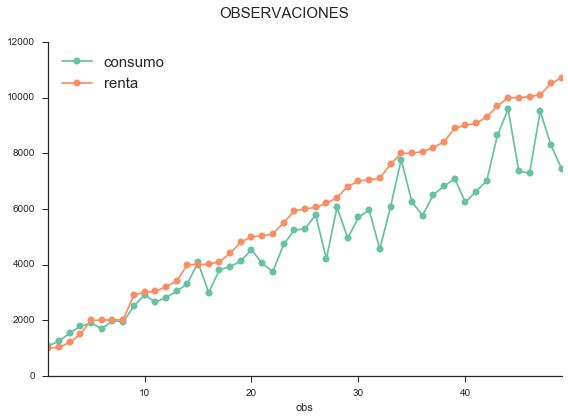

In [8]:
data.plot(marker='o')
sns.despine()
ttl = 'OBSERVACIONES'
plt.suptitle(ttl, y=1.05, fontsize=15)
plt.legend(loc=0, fontsize=15)
plt.tight_layout()

El gráfico de las variables consumo y renta, muestra que la variable consumo tiene mayores fluctuaciones que la serie renta, y además de tener un tendencia determinista creciente, es superior al consumo para casi todas las observaciones.

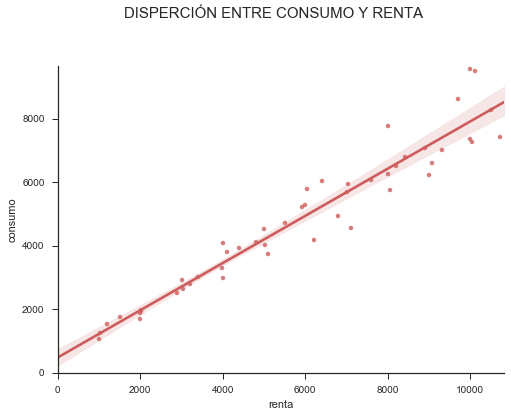

In [9]:
sns.regplot(data=data, x='renta', y='consumo', color='Indianred')
plt.xlim(0, max(data.renta)*1.01)
plt.ylim(0, max(data.consumo)*1.01)
sns.despine()
ttl = 'DISPERCIÓN ENTRE CONSUMO Y RENTA'
plt.suptitle(ttl, y=1.05, fontsize=15)

En este gráfico se puede ver la relación entre el consumo y la renta, se ajusta muy bien linealmente y tienen una relación positiva.

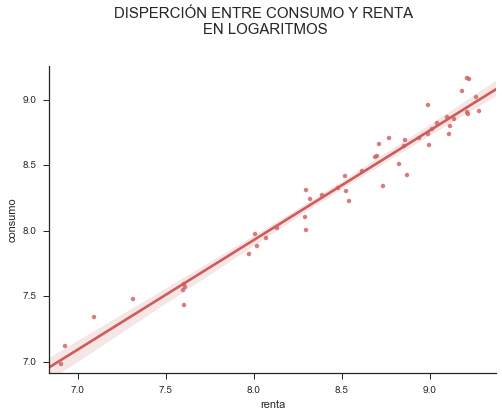

In [10]:
d = np.log(data)
sns.regplot(data=d, x='renta', y='consumo', color='Indianred')

xmax = d.renta.max() * 1.01
xmin = d.renta.min() * .99

ymax = d.consumo.max() * 1.01
ymin = d.consumo.min() * .99

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

sns.despine()
ttl = 'DISPERCIÓN ENTRE CONSUMO Y RENTA \nEN LOGARITMOS'
plt.suptitle(ttl, y=1.05, fontsize=15)

Si aplicamos logarirmos naturales a ambas variables se puede ver que el ajuste mejora.

In [11]:
f = 'consumo ~ renta'
m = ols(f, data).fit()
reg = m
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     623.3
Date:                Mon, 04 Jan 2016   Prob (F-statistic):           9.03e-29
Time:                        17:29:04   Log-Likelihood:                -382.22
No. Observations:                  49   AIC:                             768.4
Df Residuals:                      47   BIC:                             772.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    482.1375    195.461      2.467      0.0

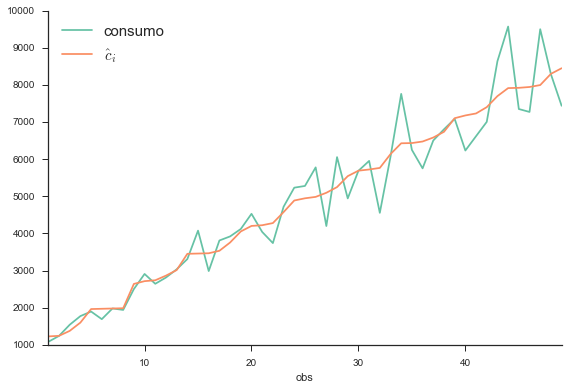

In [12]:
data['$\hat{c}_i$'] = reg.fittedvalues
data[['consumo', '$\hat{c}_i$']].plot()
plt.legend(loc=0, fontsize=15)
sns.despine()
plt.tight_layout()

En este gráfico muestra el ajuste entre consumo y su estimación. Se puede ver como en la segunda mitad de las observaciones el risiduo es mayor.

In [13]:
si = 'ay'
txt = ''
for i, (c, se) in enumerate(zip(reg.params, reg.bse)):
    txt += ('- $\\hat{c}_%s = %.3f (%.3f)$\n' % (si[i], c, se))

In [14]:
print(txt)

- $\hat{c}_a = 482.138 (195.461)$
- $\hat{c}_y = 0.744 (0.030)$



(-100, 900)

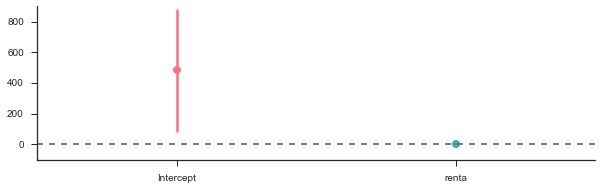

In [15]:
sns.coefplot(f, data, intercept=True)
sns.despine()
plt.ylim(-100, 900)

El resultado de la estimación ${c} = {c}_a + {c}_y·y + {u}$, nos da como resultado unos parámetros de posición que son acordes con la teoría económica: un consumo autónomo mayor que cero pero con un error estándar muy grande y una propensión marginal al consumo entre 0 y 1, ambos parámetros significativos.
En este modelo, tenemos un consumo autónomo de 482.14€, podría interpretarse como la mínima renta de subsistencia. Y una propensión marginal a consumir del 74.4%, esto es, por cada 100 euros que se incrementa la renta, los individuos gastan 74.4€ y el resto lo ahorran.

## HETEROCEDASTICIDAD

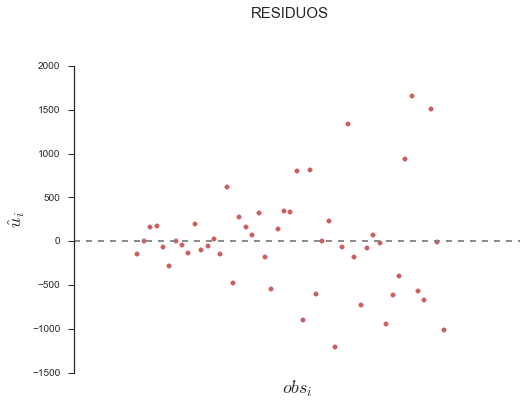

In [16]:
plt.scatter(list(range(len(reg.resid))), reg.resid, color='Indianred')

sns.despine(bottom=True)

ax = plt.gca()
ax.set_xticks([])

plt.axhline(y=0, linewidth=2, linestyle='--', color='grey', alpha=0.9)

ttl = 'RESIDUOS'
plt.ylabel('$\hat{u}_i$', fontsize=18)
plt.xlabel('$obs_i$', fontsize=18)
plt.suptitle(ttl, y=1.05, fontsize=15)

El gráfico de los residuos muestra una que la varianza no es constante.

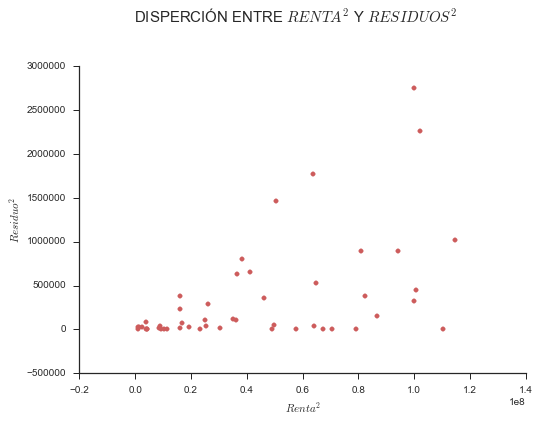

In [17]:
x, y = data.renta ** 2, reg.resid ** 2

plt.scatter(x,y, color='Indianred')
plt.xlabel('$Renta^2$')
plt.ylabel('$Residuo^2$')
sns.despine()

ttl = r'DISPERCIÓN ENTRE $RENTA^2$ Y $RESIDUOS^2$'
plt.suptitle(ttl, y=1.05, fontsize=15)

En el caso de los resduos y renta al cuadrado, vemos que hay una relación, se puede ver como aumenta la dispeción de los residuos al cuadrado cuando aumenta la renta al cuadrado. Esto nos indica que hay un problema de heterocedsaticidad.

# b) 

## Contraste de White

Lo obtiene Gretl de forma automática haciendo una regresión auxiliar del cuadrado de los residuos sobre la variable exógena y su cuadrado, calculando para esta regresión el producto de T·R2, el cual se distribuye según una Chi-cuadrado con p grados de libertad, siendo p el número de regresores de esta regresión auxiliar.

Contraste de White:
$${c}_i = {c}_a + {c}_y·y + {u}_i$$

Se obtiene $\hat{u}_i$ y se plantea la regresión auxiliar:
$$\hat{u}_i = \alpha_0 + \alpha_1 · y_i^2 + v_i$$

El estadístico de White:
$W = 49·R_{ra}^2 \sim \chi^2(1)$

$H_0: \text{Homocedasticidad}, \alpha_1=0$

$H_a: \text{Heterocedasticidad}, \alpha_1\ne0$

In [18]:
t =  sm.stats.diagnostic.het_white(reg.resid, reg.model.exog)[:2]
string = '%.4f (%.4f)'
print('White: '+ string % (t[0], t[1]))

White: 13.3226 (0.0013)


In [19]:
print('$\chi_{\\text{value}}^2(1) = %s$' % chi2.ppf(1-0.05, df=1))

$\chi_{\text{value}}^2(1) = 3.84145882069$


Para este caso, se rechaza la hipótesis nula de homocedasticidad para un nivel de signifiación del 5 y 1%.

# c) 
## Contraste de Breusch-Pagan: 

El contraste de Breusch-Pagan que calcula Gretl incluye en la regresión auxiliar todo el conjunto de variables de nuestro modelo, como en nuestro caso tenemos sólo una variable, vamos a hacer el contraste de __forma manual__ para entender mejor cómo se lleva a cabo. Para obtener el estadístico de contraste BP se realiza una __regresión auxiliar__ donde, como variable __dependiente__ aparecen los __residuos al cuadrado__ del modelo estimado __divididos__ por la __estimación máximo verosímil de la varianza__, y como __variables explicativas__ aquellas que se piensa puedan causar el problema de varianza no constante, en nuestro caso, la __renta__.

Para el cálculo concreto del estadístico, dentro de la ventana de resultados de la estimación del modelo original, iremos a la opción Guardar-Definir nueva variable, y allí definiremos la variable siguiente: `bp1=($uhat^2)/($ess/$nobs)`, donde las variables con $ delante son variables internas que guarda Gretl cada vez que hace una regresión. Construida la variable dependiente de la regresión auxiliar, se efectúa dicha regresión y se calcula el estadístico de __Breusch-Pagan__ como el valor de la __Suma Explicada (SE) dividida por dos__ (la Suma Explicada se puede obtener en el menú ANOVA de los resultados de la regresión). Una vez calculado el estadístico, su valor se __compara con una Chi-cuadrado con p grados de libertad__ igual al número de parámetros de posición de la regresión auxiliar sin tener en cuenta el término independiente. Recordemos que Gretl permite obtener directamente el p-valor de un estadístico, conociendo los grados de libertad de la distribución que sigue, para ello hay que ir a la opción Herramientas-buscador de valores p, ir a la pestaña de la Chi-cuadrado y poner el valor del estadístico calculado y los grados de libertad (1 en nuestro caso porque sólo hemos considerado una explicativa). 


- Estimar el residuo del modelo orginal:

$$\hat{c} = \hat{c}_a + \hat{c}_y·y + \hat{u}$$

- Estimar el residuo de la regresión auxiliar:

$$\frac{\hat{u}}{\widetilde{\sigma}_{\hat{c}}} = \hat{\gamma}_1 + \hat{\gamma}_2·y + \hat{\epsilon}$$

- El estimador BP:

$$BP = \frac{SE_{ra}}{2} \sim \chi^2(1)$$

$H_0$: Homocedastividad, $\gamma_2 = 0$

$H_a$: Heterocedasticidad, $\gamma_2 \ne 0$

In [20]:
sigma_mv = (reg.ssr / reg.nobs)

In [21]:
bp_endog = reg.resid ** 2 / sigma_mv

In [22]:
data_bp = pd.DataFrame.from_dict({'endog': bp_endog, 'renta': data.renta})

In [23]:
print(sms.anova_lm(reg))

          df        sum_sq       mean_sq           F        PR(>F)
renta      1  2.268472e+08  2.268472e+08  623.285017  9.034474e-29
Residual  47  1.710584e+07  3.639541e+05         NaN           NaN


In [24]:
fc = 'endog ~ renta'

regc = ols(fc, data_bp).fit()
e = 0.05 # signification
se_ra = np.power(regc.fittedvalues - regc.fittedvalues.mean(), 2) # SSE
se_ra = np.sum(se_ra)
bp_value = se_ra / 2
bp_score = sns.stats.chi2.ppf(1 - e/2, df=1)
res = (bp_value, bp_score)
print('BP = %.3f&nbsp;&nbsp;&nbsp;&nbsp;$\chi^2(1) = %.3f$' % res)

BP = 17.832&nbsp;&nbsp;&nbsp;&nbsp;$\chi^2(1) = 5.024$


In [25]:
print('$\chi_{\\text{value}}^2(1) = %s$' % chi2.ppf(1-0.05, df=1))

$\chi_{\text{value}}^2(1) = 3.84145882069$


Como en el anterior apartado, se rechaza la homocedasticidad, para un nivel de signifiación del 5% la $\chi^2$ de tablas es menor que la obtenida para el BP. 

# d)  
## Vamos a tratar la posible presencia de heteroscedasticidad de la variable renta suponiendo dos tipos de estructuras heteroscedásticas:

- (1)  $V(u_i) = \alpha + \beta· renta_i^2$

- (2)  $log V(u_i) = \alpha + \beta · log(renta_i)$  $\longrightarrow$  heteroscedasticidad multiplicativa

Para determinar cuál de las dos estructuras es la más adecuada, habrá que hacer las regresiones que corresponda según el supuesto adoptado:

- si (1): $\hat{u}^2 = \alpha + \beta · renta_i^2 + v_i$

- si (2): $log (\hat{u}^2) = \alpha + \beta · log(renta_i) + v_i$

Se aceptará que existe un determinado __tipo de heteroscedasticidad__ u otro si en el modelo estimado la variable __log renta es significativa__, en ese caso, nos quedaremos con el modelo en que el __t-ratio sea mayor__. 

En caso de que se aceptara el primer tipo de heteroscedasticidad, para estimar el modelo de forma adecuada debemos aplicar Mínimos Cuadrados Generalizados Factibles, lo cual implica ponderar todas las variables del modelo por la desviación típica de la varianza, es decir, __dividir por la variable Renta__, tanto la variable endógena, como la constante y la variable exógena. 

Una vez construidas las nuevas variables, se estima el nuevo modelo por MCO y los nuevos coeficientes estimados ya están libres de problemas de heteroscedasticidad. En caso de aceptar __heteroscedasticidad multiplicativa__, para corregir el modelo original habría que ponderarlo por:

$\sqrt{e^{[\alpha + \beta · log (renta)]}}$

De este nuevo modelo se pueden __analizar los residuos__ para ver si su varianza ya es constante. Hacer el __gráfico__ de los __residuos__ frente a la variable __Renta__ y hacer también el contraste de __White__. __Valorar__ también el __cambio__ producido en los __parámetros__ estimados respecto al modelo inicial.

In [26]:
data['uhat2'] = reg.resid ** 2
fd1 = 'uhat2 ~ np.power(renta, 2)'
md1 = ols(fd1, data).fit()

In [27]:
print(md1.summary())

                            OLS Regression Results                            
Dep. Variable:                  uhat2   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     17.45
Date:                Mon, 04 Jan 2016   Prob (F-statistic):           0.000127
Time:                        17:29:06   Log-Likelihood:                -713.34
No. Observations:                  49   AIC:                             1431.
Df Residuals:                      47   BIC:                             1434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.618e+04   1.18

In [28]:
fd2 = 'np.log(uhat2) ~ np.log(renta)'
md2 = ols(fd2, data).fit()
print(md2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(uhat2)   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     10.70
Date:                Mon, 04 Jan 2016   Prob (F-statistic):            0.00201
Time:                        17:29:06   Log-Likelihood:                -123.86
No. Observations:                  49   AIC:                             251.7
Df Residuals:                      47   BIC:                             255.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.7203      5.869     -1.486

A la vista de los modelos, __la estructura (1)__ es más significativa que la (2), por tanto planteamos el modelo lineal generalizado, siguiendo dicha estructura.

$\hat{u}^2 = \alpha + \beta · \text{renta}_i^2 + v_i$ __(1)__

$\hat{u} = \sqrt{\hat{\alpha} + \hat{\beta} · \text{renta}_i^2 + v_i}$

## Estimar:

$$\frac{\text{consumo}}{\text{renta}} = {c_a} · \frac{1}{\text{renta}} + {c_y} + \epsilon_i$$

En este caso los coeficientes tiene la interpretación inversa que en el modelo inicial, de forma que el que acompaña a la renta es el consumo autónomo y la propensión marginal a consumir es el término independiente ya que la endógena es la proporción entre consumo y renta.

In [29]:
# modelo corregido
d = data.copy()
d['consumo_by_renta'] = d.consumo / d.renta
d['by_renta'] = 1 / d.renta
formula_d = 'consumo_by_renta ~ by_renta'
md = ols(formula_d, d).fit()

print(md.summary())

                            OLS Regression Results                            
Dep. Variable:       consumo_by_renta   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     63.96
Date:                Mon, 04 Jan 2016   Prob (F-statistic):           2.57e-10
Time:                        17:29:06   Log-Likelihood:                 49.920
No. Observations:                  49   AIC:                            -95.84
Df Residuals:                      47   BIC:                            -92.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7473      0.020     37.917      0.0

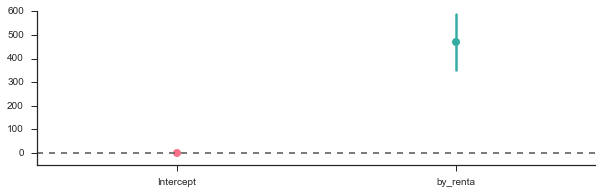

In [30]:
sns.coefplot(formula_d, d, intercept=True)
plt.ylim(-50, 600)
sns.despine()

In [31]:
si = 'ya'
txt = ''
for i, (c, se) in enumerate(zip(md.params, md.bse)):
    txt += ('- $\\hat{c}_%s = %.3f (%.3f)$\n' % (si[i], c, se))
print(txt)

- $\hat{c}_y = 0.747 (0.020)$
- $\hat{c}_a = 468.900 (58.629)$



El modelo trasnformado puede escribirse como, $\frac{c_i}{y_i} = c_y · \frac{1}{y_i} + c_a + u$, e interpretarse como la proporción de renta que se destina a consumo depende del consumo autónomo, y de la porpensión marginal al consumo (porcentaje de consumo) ponderado por la renta.

De esta forma la interpretación no varía, y los parámetros estimados tienen la misma concordancia con la teoría economica (ambos parámetros positivos, y con una propensión marginal al consumo entre 0 y 1) con el añadido que ya no hay problemas de heterocedasticidad.

En este modelo, tenemos un consumo autónomo de 468.9€, es decir, que aunque la renta fuera 0, lo inviduos gastan esa cantidad. La propensión marginal al consumo, es de 0.747 ligeramente superior a la estimada con anterioridad. Nos dice que si aumenta la renta en un euro el consumo aumenta en 0.747 euros y el resto lo ahorran.

In [32]:
names = ['White', 'pvalue', 'F', 'pvalue']
txt = ''
for i, e in enumerate(sm.stats.diagnostic.het_white(md.resid, md.model.exog)):
    txt += '- __%s:__ %s\n' % (names[i], e)
print(txt)

- __White:__ 1.73408097966
- __pvalue:__ 0.420193277165
- __F:__ 0.843818619397
- __pvalue:__ 0.436612947563



El contraste de white ahora nos arroja evidencia en contra de la hipótesis alternativa, por tanto no podemos rechazar la existencia de homocedasticidad para un nivel de significatividad del 5%, pvalue > 0.05.

(0, 0.0011000000000000001)

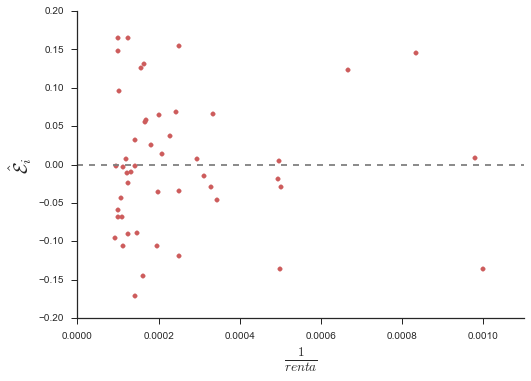

In [33]:
x = md.model.exog[:,1]
y = np.array(md.resid)

plt.scatter(x=x, y=y, color='Indianred')
plt.axhline(0, linewidth=2, color='grey', linestyle='--', alpha=0.9)
plt.xlabel(r'$\frac{1}{renta}$', fontsize=19)
plt.ylabel(r'$\hat{\mathcal{E}}_i$', fontsize=19)

sns.despine()
plt.xlim(0, max(x)*1.1)

Si vemos el gráfico de los residuos, vemos que se distribuyen homogeneamente entre los valores del residuo, y no se aprecia a simple vista relación entre los residuos y la nueva variable de renta.

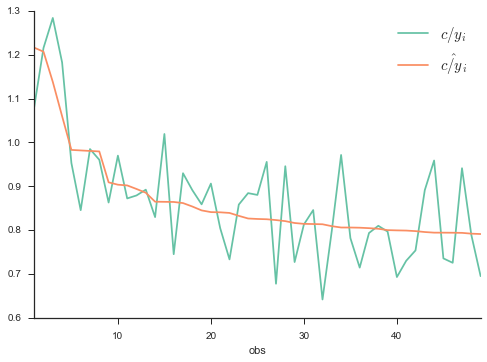

In [34]:
d['$\hat{c/y}_i$'] = md.fittedvalues
d['$c/y_i$'] = d['consumo_by_renta']
d[['$c/y_i$','$\hat{c/y}_i$']].plot()
plt.legend(loc=0, fontsize=15)
sns.despine()

El gráfico muestra los valores reales de la nueva variable endógena, y su estimación, se puede ver el correcto ajuste y unos errores homogéneos.

In [35]:
si = 'ay'
txt = '|parametros|modelo1|modelo2|\n|:---:|:---:|:---:|\n'
for i, (c, se) in enumerate(zip(reg.params, reg.bse)):
    txt += ('|$\\hat{c}_%s$ | %.3f (%.3f)| %.3f (%.3f)|\n' % (si[i], c, se, md.params[i-1], reg.bse[i-1]))
txt += '|$R^2$|%.3f|%.3f|\n' % (reg.rsquared_adj, md.rsquared_adj)
txt += '|JB |%.3f (%.3f)|%.3f (%.3f)|\n' % (*sms.jarque_bera(reg.resid)[:2], *sms.jarque_bera(md.resid)[:2])
txt += '|White|%.3f (%.3f)|%.3f (%.3f)|\n' % (*sms.het_white(reg.resid, reg.model.exog)[:2], 
                                            *sms.het_white(md.resid, md.model.exog)[:2])

print(txt)

|parametros|modelo1|modelo2|
|:---:|:---:|:---:|
|$\hat{c}_a$ | 482.138 (195.461)| 468.900 (0.030)|
|$\hat{c}_y$ | 0.744 (0.030)| 0.747 (195.461)|
|$R^2$|0.928|0.567|
|JB |5.116 (0.077)|1.236 (0.539)|
|White|13.323 (0.001)|1.734 (0.420)|



Si comparamos los modelos, vamos que cambian los parámetros ligeramente. En el modelo 2 se estima con mayor precisión el consumo autónomo, mientras que en el modelo 1 el mas preciso el la propensión marginal al consumo. Sin embargo el modelo 1 presenta problemas de heterocedasticicdad mientras que el modelo 2 sigue los supuestos del MLG.

Sin embargo, con el cambio de modelo, se pierde gran parte del poder explicativo, pasando de un $R^2 = 0.928$ con el modelo 1 a un $R^2 = 0.567$ con el modelo 2.

Como alternativa se podría estimar el modelo 1 con estimaciones robustas.